In [1]:
from impresso import connect

impresso = connect()

🎉 You are now connected to the Impresso API!  🎉
🔗 Using API: https://dev.impresso-project.ch/public-api


# Search

Find articles in Impresso using a variety of different filters.

## Term

Find all items containing "impresso" keyword.

In [2]:
impresso.search.find(q="impresso")

,type,title,size,nbPages,pages,isCC,excerpt,labels,accessRight,year,locations,persons,language,matches,regions,regionBreaks,contentLineBreaks,isFront,date,country,tags,collections,dataProvider,topics,mentions,issue.uid,issue.cover,issue.labels,issue.fresh,issue.accessRights,issue.date,issue.year,newspaper.uid,newspaper.acronym,newspaper.labels,newspaper.languages,newspaper.included,newspaper.name,newspaper.endYear,newspaper.startYear,newspaper.countArticles,newspaper.countIssues,newspaper.countPages,newspaper.deltaYear,newspaper.properties,newspaper.fetched,newspaper.firstIssue.uid,newspaper.firstIssue.cover,newspaper.firstIssue.labels,newspaper.firstIssue.fresh,newspaper.firstIssue.accessRights,newspaper.firstIssue.date,newspaper.firstIssue.year,newspaper.lastIssue.uid,newspaper.lastIssue.cover,newspaper.lastIssue.labels,newspaper.lastIssue.fresh,newspaper.lastIssue.accessRights,newspaper.lastIssue.date,newspaper.lastIssue.year
uid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
LLE-1976-02-23-a-i0207,ad,UNKNOWN,37,1,"[{'uid': 'LLE-1976-02-23-a-p0004', 'num': 4, '...",False,IMPRESSO-RAPID Carre ä Domdidier cherche pour ...,[article],OpenPrivate,1976,[],[],fr,[{'fragment': '<em>IMPRESSO</em>-RAPID Carre ä...,"[{'pageUid': 'LLE-1976-02-23-a-p0004', 'coords...",[],[],False,1976-02-23T00:00:00+00:00,CH,[],[],SNL,"[{'relevance': 0.023, 'topic': {'uid': 'tm-fr-...",[],LLE-1976-02-23-a,,[issue],False,NotDefined,1976-02-23T00:00:00+00:00,1976,LLE,LLE,[newspaper],[fr],True,La Liberté,2018,1871,-1,-1,-1,147,[],True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LLE-1973-05-18-a-i0016,ad,UNKNOWN,46,1,"[{'uid': 'LLE-1973-05-18-a-p0022', 'num': 22, ...",False,"Imprimerie Impresso-rapide CARREL , Domdidier ...",[article],OpenPrivate,1973,[],[],fr,[{'fragment': 'Imprimerie <em>Impresso</em>-ra...,"[{'pageUid': 'LLE-1973-05-18-a-p0022', 'coords...",[],[],False,1973-05-18T00:00:00+00:00,CH,[],[],SNL,"[{'relevance': 0.035, 'topic': {'uid': 'tm-fr-...",[],LLE-1973-05-18-a,,[issue],False,NotDefined,1973-05-18T00:00:00+00:00,1973,LLE,LLE,[newspaper],[fr],True,La Liberté,2018,1871,-1,-1,-1,147,[],True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FZG-1995-11-27-a-i0121,ar,"Kaffeemaschine ""Impresso"" Bügeleisen Dampfrein...",22,1,"[{'uid': 'FZG-1995-11-27-a-p0004', 'num': 4, '...",False,Kaffeemaschine Impresso Bügeleisen Dampfreinig...,[article],OpenPrivate,1995,"[{'uid': 'aida-0001-54-SC_Freiburg', 'relevanc...",[],de,[{'fragment': 'Kaffeemaschine <em>Impresso</em...,"[{'pageUid': 'FZG-1995-11-27-a-p0004', 'coords...",[],[],False,1995-11-27T00:00:00+00:00,CH,[],[],SNL,"[{'relevance': 0.085, 'topic': {'uid': 'tm-de-...",[],FZG-1995-11-27-a,,[issue],False,NotDefined,1995-11-27T00:00:00+00:00,1995,FZG,FZG,[newspaper],[de],True,Freiburger Nachrichten,2018,1865,-1,-1,-1,153,[],True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## With text content only

Limit to articles that have text.

In [3]:
impresso.search.find(q="impresso", with_text_contents=True)

,type,title,size,nbPages,pages,isCC,excerpt,labels,accessRight,year,locations,persons,language,matches,regions,regionBreaks,contentLineBreaks,isFront,date,country,tags,collections,dataProvider,topics,mentions,issue.uid,issue.cover,issue.labels,issue.fresh,issue.accessRights,issue.date,issue.year,newspaper.uid,newspaper.acronym,newspaper.labels,newspaper.languages,newspaper.included,newspaper.name,newspaper.endYear,newspaper.startYear,newspaper.countArticles,newspaper.countIssues,newspaper.countPages,newspaper.deltaYear,newspaper.properties,newspaper.fetched,newspaper.firstIssue.uid,newspaper.firstIssue.cover,newspaper.firstIssue.labels,newspaper.firstIssue.fresh,newspaper.firstIssue.accessRights,newspaper.firstIssue.date,newspaper.firstIssue.year,newspaper.lastIssue.uid,newspaper.lastIssue.cover,newspaper.lastIssue.labels,newspaper.lastIssue.fresh,newspaper.lastIssue.accessRights,newspaper.lastIssue.date,newspaper.lastIssue.year
uid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
LLE-1976-02-23-a-i0207,ad,UNKNOWN,37,1,"[{'uid': 'LLE-1976-02-23-a-p0004', 'num': 4, '...",False,IMPRESSO-RAPID Carre ä Domdidier cherche pour ...,[article],OpenPrivate,1976,[],[],fr,[{'fragment': '<em>IMPRESSO</em>-RAPID Carre ä...,"[{'pageUid': 'LLE-1976-02-23-a-p0004', 'coords...",[],[],False,1976-02-23T00:00:00+00:00,CH,[],[],SNL,"[{'relevance': 0.023, 'topic': {'uid': 'tm-fr-...",[],LLE-1976-02-23-a,,[issue],False,NotDefined,1976-02-23T00:00:00+00:00,1976,LLE,LLE,[newspaper],[fr],True,La Liberté,2018,1871,-1,-1,-1,147,[],True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LLE-1973-05-18-a-i0016,ad,UNKNOWN,46,1,"[{'uid': 'LLE-1973-05-18-a-p0022', 'num': 22, ...",False,"Imprimerie Impresso-rapide CARREL , Domdidier ...",[article],OpenPrivate,1973,[],[],fr,[{'fragment': 'Imprimerie <em>Impresso</em>-ra...,"[{'pageUid': 'LLE-1973-05-18-a-p0022', 'coords...",[],[],False,1973-05-18T00:00:00+00:00,CH,[],[],SNL,"[{'relevance': 0.035, 'topic': {'uid': 'tm-fr-...",[],LLE-1973-05-18-a,,[issue],False,NotDefined,1973-05-18T00:00:00+00:00,1973,LLE,LLE,[newspaper],[fr],True,La Liberté,2018,1871,-1,-1,-1,147,[],True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FZG-1995-11-27-a-i0121,ar,"Kaffeemaschine ""Impresso"" Bügeleisen Dampfrein...",22,1,"[{'uid': 'FZG-1995-11-27-a-p0004', 'num': 4, '...",False,Kaffeemaschine Impresso Bügeleisen Dampfreinig...,[article],OpenPrivate,1995,"[{'uid': 'aida-0001-54-SC_Freiburg', 'relevanc...",[],de,[{'fragment': 'Kaffeemaschine <em>Impresso</em...,"[{'pageUid': 'FZG-1995-11-27-a-p0004', 'coords...",[],[],False,1995-11-27T00:00:00+00:00,CH,[],[],SNL,"[{'relevance': 0.085, 'topic': {'uid': 'tm-de-...",[],FZG-1995-11-27-a,,[issue],False,NotDefined,1995-11-27T00:00:00+00:00,1995,FZG,FZG,[newspaper],[de],True,Freiburger Nachrichten,2018,1865,-1,-1,-1,153,[],True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Title
Find items that have the keyword "impresso" in their title.

In [4]:
impresso.search.find(title="impresso")

,type,title,size,nbPages,pages,isCC,excerpt,labels,accessRight,year,locations,persons,language,matches,regions,regionBreaks,contentLineBreaks,isFront,date,country,tags,collections,dataProvider,topics,mentions,issue.uid,issue.cover,issue.labels,issue.fresh,issue.accessRights,issue.date,issue.year,newspaper.uid,newspaper.acronym,newspaper.labels,newspaper.languages,newspaper.included,newspaper.name,newspaper.endYear,newspaper.startYear,newspaper.countArticles,newspaper.countIssues,newspaper.countPages,newspaper.deltaYear,newspaper.properties,newspaper.fetched
uid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
FZG-1995-11-27-a-i0121,ar,"Kaffeemaschine ""Impresso"" Bügeleisen Dampfrein...",22,1,"[{'uid': 'FZG-1995-11-27-a-p0004', 'num': 4, '...",False,Kaffeemaschine Impresso Bügeleisen Dampfreinig...,[article],OpenPrivate,1995,"[{'uid': 'aida-0001-54-SC_Freiburg', 'relevanc...",[],de,[],"[{'pageUid': 'FZG-1995-11-27-a-p0004', 'coords...",[],[],False,1995-11-27T00:00:00+00:00,CH,[],[],SNL,"[{'relevance': 0.085, 'topic': {'uid': 'tm-de-...",[],FZG-1995-11-27-a,,[issue],False,NotDefined,1995-11-27T00:00:00+00:00,1995,FZG,FZG,[newspaper],[de],True,Freiburger Nachrichten,2018,1865,-1,-1,-1,153,[],True
DTT-1976-12-02-a-i0114,ar,DRSI 6.05 Impresso. 6.50 Zum neuen Tag. ...,504,1,"[{'uid': 'DTT-1976-12-02-a-p0014', 'num': 14, ...",False,DRSI 6 . 05 Impresso . 6 . 50 Zum neuen Tag . ...,[article],OpenPrivate,1976,"[{'uid': 'aida-0001-54-Basel', 'relevance': 1}...","[{'uid': 'aida-0001-50-Rudolf_Kelterborn', 're...",de,[],"[{'pageUid': 'DTT-1976-12-02-a-p0014', 'coords...",[],[],False,1976-12-02T00:00:00+00:00,CH,[],[],Migros,"[{'relevance': 0.037, 'topic': {'uid': 'tm-de-...",[],DTT-1976-12-02-a,,[issue],False,NotDefined,1976-12-02T00:00:00+00:00,1976,DTT,DTT,[newspaper],[],True,,-1,-1,-1,-1,-1,0,[],NaN


### Complex term requests
Find items that have both terms.

In [5]:
from impresso import AND

impresso.search.find(title=AND("homme", "femme"))

,type,title,size,nbPages,pages,isCC,excerpt,labels,accessRight,year,locations,persons,language,matches,regions,regionBreaks,contentLineBreaks,isFront,date,country,tags,collections,dataProvider,topics,mentions,issue.uid,issue.cover,issue.labels,issue.fresh,issue.accessRights,issue.date,issue.year,newspaper.uid,newspaper.acronym,newspaper.labels,newspaper.languages,newspaper.included,newspaper.name,newspaper.endYear,newspaper.startYear,newspaper.countArticles,newspaper.countIssues,newspaper.countPages,newspaper.deltaYear,newspaper.properties,newspaper.fetched,newspaper.firstIssue.uid,newspaper.firstIssue.cover,newspaper.firstIssue.labels,newspaper.firstIssue.fresh,newspaper.firstIssue.accessRights,newspaper.firstIssue.date,newspaper.firstIssue.year,newspaper.lastIssue.uid,newspaper.lastIssue.cover,newspaper.lastIssue.labels,newspaper.lastIssue.fresh,newspaper.lastIssue.accessRights,newspaper.lastIssue.date,newspaper.lastIssue.year
uid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
LLE-1961-06-03-a-i0150,ar,— Qui l'a appelee ? Un homme ? Une femme...,91,1,"[{'uid': 'LLE-1961-06-03-a-p0015', 'num': 15, ...",False,— Qui la appelee ? Un homme ? Une femme ? dema...,[article],OpenPrivate,1961,"[{'uid': 'aida-0001-54-Luis_Vera', 'relevance'...",[],fr,[],"[{'pageUid': 'LLE-1961-06-03-a-p0015', 'coords...",[],[],False,1961-06-03T00:00:00+00:00,CH,[],[],SNL,"[{'relevance': 0.048, 'topic': {'uid': 'tm-fr-...",[],LLE-1961-06-03-a,,[issue],False,NotDefined,1961-06-03T00:00:00+00:00,1961,LLE,LLE,[newspaper],[fr],True,La Liberté,2018.0,1871.0,-1,-1,-1,147,[],True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EXP-2012-11-29-a-i0054,ar,"«L’homme dirige, décide, la femme interprète»",538,1,"[{'uid': 'EXP-2012-11-29-a-p0007', 'num': 7, '...",False,"« L’homme dirige, décide, la femme interprète ...",[article],OpenPrivate,2012,"[{'uid': 'aida-0001-54-Lake_Neuchâtel', 'relev...","[{'uid': 'aida-0001-50-Froidevaux', 'relevance...",fr,[],"[{'pageUid': 'EXP-2012-11-29-a-p0007', 'coords...",[],[],False,2012-11-29T00:00:00+00:00,CH,[],[],SNL,"[{'relevance': 0.047, 'topic': {'uid': 'tm-fr-...",[],EXP-2012-11-29-a,,[issue],False,NotDefined,2012-11-29T00:00:00+00:00,2012,EXP,EXP,[newspaper],[fr],True,L'Express,2018.0,1738.0,8397287,46204,701819,280,[],True,EXP-1740-01-01-a,,[issue],False,Closed,1740-01-01T00:00:00+00:00,1740,EXP-2017-10-31-a,,[issue],False,Closed,2017-10-31T00:00:00+00:00,2017
EXP-2017-05-19-a-i0004,ar,"Quand il s’agit de faire le mal, l’homme est p...",86,1,"[{'uid': 'EXP-2017-05-19-a-p0001', 'num': 1, '...",False,"Quand il s’agit de faire le mal, l’homme est p...",[article],OpenPrivate,2017,"[{'uid': 'aida-0001-54-Lake_Neuchâtel', 'relev...",[],fr,[],"[{'pageUid': 'EXP-2017-05-19-a-p0001', 'coords...",[],[],True,2017-05-19T00:00:00+00:00,CH,[],[],SNL,"[{'relevance': 0.032, 'topic': {'uid': 'tm-fr-...",[],EXP-2017-05-19-a,,[issue],False,NotDefined,2017-05-19T00:00:00+00:00,2017,EXP,EXP,[newspaper],[fr],True,L'Express,2018.0,1738.0,8397287,46204,701819,280,[],True,EXP-1740-01-01-a,,[issue],False,Closed,1740-01-01T00:00:00+00:00,1740,EXP-2017-10-31-a,,[issue],False,Closed,2017-10-31T00:00:00+00:00,2017


Find items that have either one term or the other.

Here we find all articles that contain either "homme" or "femme" in the title.

In [6]:
from impresso import OR

impresso.search.find(title=OR("homme", "femme"))

,type,title,size,nbPages,pages,isCC,excerpt,labels,accessRight,year,locations,persons,language,matches,regions,regionBreaks,contentLineBreaks,isFront,date,country,tags,collections,dataProvider,topics,mentions,issue.uid,issue.cover,issue.labels,issue.fresh,issue.accessRights,issue.date,issue.year,newspaper.uid,newspaper.acronym,newspaper.labels,newspaper.languages,newspaper.included,newspaper.name,newspaper.endYear,newspaper.startYear,newspaper.countArticles,newspaper.countIssues,newspaper.countPages,newspaper.deltaYear,newspaper.properties,newspaper.firstIssue.uid,newspaper.firstIssue.cover,newspaper.firstIssue.labels,newspaper.firstIssue.fresh,newspaper.firstIssue.accessRights,newspaper.firstIssue.date,newspaper.firstIssue.year,newspaper.lastIssue.uid,newspaper.lastIssue.cover,newspaper.lastIssue.labels,newspaper.lastIssue.fresh,newspaper.lastIssue.accessRights,newspaper.lastIssue.date,newspaper.lastIssue.year,newspaper.fetched
uid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
EXP-1933-01-17-a-i0003,ar,One jeune femme promet le mariage à son maître...,132,1,"[{'uid': 'EXP-1933-01-17-a-p0001', 'num': 1, '...",True,One jeune femme promet le mariage à son maître...,[article],OpenPrivate,1933,"[{'uid': 'aida-0001-54-Lausanne', 'relevance':...",[],fr,[],"[{'pageUid': 'EXP-1933-01-17-a-p0001', 'coords...",[],[],True,1933-01-17T00:00:00+00:00,CH,[],[],SNL,"[{'relevance': 0.128, 'topic': {'uid': 'tm-fr-...",[],EXP-1933-01-17-a,,[issue],False,NotDefined,1933-01-17T00:00:00+00:00,1933,EXP,EXP,[newspaper],[fr],True,L'Express,2018,1738,8397287,46204,701819,280,[],EXP-1740-01-01-a,,[issue],False,Closed,1740-01-01T00:00:00+00:00,1740,EXP-2017-10-31-a,,[issue],False,Closed,2017-10-31T00:00:00+00:00,2017,True
LLE-1961-01-10-a-i0078,ar,pour Ia femme moderne,13,1,"[{'uid': 'LLE-1961-01-10-a-p0013', 'num': 13, ...",False,"pour Ia femme moderne VOICI , Persil extra — l...",[article],OpenPrivate,1961,[],[],fr,[],"[{'pageUid': 'LLE-1961-01-10-a-p0013', 'coords...",[],[],False,1961-01-10T00:00:00+00:00,CH,[],[],SNL,"[{'relevance': 0.087, 'topic': {'uid': 'tm-fr-...",[],LLE-1961-01-10-a,,[issue],False,NotDefined,1961-01-10T00:00:00+00:00,1961,LLE,LLE,[newspaper],[fr],True,La Liberté,2018,1871,-1,-1,-1,147,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
EXP-1933-02-04-a-i0028,ar,"Jeune homme honnête, intelligent, parlan...",421,1,"[{'uid': 'EXP-1933-02-04-a-p0002', 'num': 2, '...",True,"Jeune homme honnête, intelligent, parlant fran...",[article],OpenPrivate,1933,"[{'uid': 'aida-0001-54-Paddle_steamer_Genève',...","[{'uid': 'aida-0001-50-Martina_Schild', 'relev...",fr,[],"[{'pageUid': 'EXP-1933-02-04-a-p0002', 'coords...",[],[],False,1933-02-04T00:00:00+00:00,CH,[],[],SNL,"[{'relevance': 0.022, 'topic': {'uid': 'tm-fr-...",[],EXP-1933-02-04-a,,[issue],False,NotDefined,1933-02-04T00:00:00+00:00,1933,EXP,EXP,[newspaper],[fr],True,L'Express,2018,1738,8397287,46204,701819,280,[],EXP-1740-01-01-a,,[issue],False,Closed,1740-01-01T00:00:00+00:00,1740,EXP-2017-10-31-a,,[issue],False,Closed,2017-10-31T00:00:00+00:00,2017,True


## Inverted search (everything excluding term A __OR__ term B).

We want to find all articles with the word "luddite" in the title that do not mention neither "textile" nor "machine"

In [7]:
from impresso import OR

impresso.search.find(title="luddite", q=~OR("textile", "machine"))

,type,title,size,nbPages,pages,isCC,excerpt,labels,accessRight,year,locations,persons,language,matches,regions,regionBreaks,contentLineBreaks,isFront,date,country,tags,collections,dataProvider,topics,mentions,issue.uid,issue.cover,issue.labels,issue.fresh,issue.accessRights,issue.date,issue.year,newspaper.uid,newspaper.acronym,newspaper.labels,newspaper.languages,newspaper.included,newspaper.name,newspaper.endYear,newspaper.startYear,newspaper.countArticles,newspaper.countIssues,newspaper.countPages,newspaper.deltaYear,newspaper.properties,newspaper.firstIssue.uid,newspaper.firstIssue.cover,newspaper.firstIssue.labels,newspaper.firstIssue.fresh,newspaper.firstIssue.accessRights,newspaper.firstIssue.date,newspaper.firstIssue.year,newspaper.lastIssue.uid,newspaper.lastIssue.cover,newspaper.lastIssue.labels,newspaper.lastIssue.fresh,newspaper.lastIssue.accessRights,newspaper.lastIssue.date,newspaper.lastIssue.year,newspaper.fetched
uid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
LES-2010-02-01-a-i0024,ar,"La révolte luddite Kirkpatrick Sale, Edition L...",1,1,"[{'uid': 'LES-2010-02-01-a-p0011', 'num': 11, ...",False,"LarévolteludditeKirkpatrickSale,EditionL’Echap...",[article],OpenPrivate,2010,"[{'uid': 'aida-0001-54-England', 'relevance': 1}]",[],en,[],"[{'pageUid': 'LES-2010-02-01-a-p0011', 'coords...",[],[],False,2010-02-01T00:00:00+00:00,CH,[],[],SNL,[],[],LES-2010-02-01-a,,[issue],False,NotDefined,2010-02-01T00:00:00+00:00,2010,LES,LES,[newspaper],[fr],True,L'Essor,2018,1906,51843,2120,10611,112,[],LES-1906-01-01-a,,[issue],False,Closed,1906-01-01T00:00:00+00:00,1906,LES-2015-01-01-a,,[issue],False,Closed,2015-01-01T00:00:00+00:00,2015,True


### Complex combintation of terms

The following cell searches all articles with all of the the following condition:

* mentioning "hitler" and "stalin"
* also mentioning one of: "molotow" or "ribbentrop"
* and not mentioning "churchill"

In [8]:
from impresso import AND, OR

impresso.search.find(q=AND("hitler", "stalin") & OR("molotow", "ribbentrop") & ~OR("churchill"))

,type,title,size,nbPages,pages,isCC,excerpt,labels,accessRight,year,locations,persons,language,matches,regions,regionBreaks,contentLineBreaks,isFront,date,country,tags,collections,dataProvider,topics,mentions,issue.uid,issue.cover,issue.labels,issue.fresh,issue.accessRights,issue.date,issue.year,newspaper.uid,newspaper.acronym,newspaper.labels,newspaper.languages,newspaper.included,newspaper.name,newspaper.endYear,newspaper.startYear,newspaper.countArticles,newspaper.countIssues,newspaper.countPages,newspaper.deltaYear,newspaper.properties,newspaper.fetched,newspaper.firstIssue.uid,newspaper.firstIssue.cover,newspaper.firstIssue.labels,newspaper.firstIssue.fresh,newspaper.firstIssue.accessRights,newspaper.firstIssue.date,newspaper.firstIssue.year,newspaper.lastIssue.uid,newspaper.lastIssue.cover,newspaper.lastIssue.labels,newspaper.lastIssue.fresh,newspaper.lastIssue.accessRights,newspaper.lastIssue.date,newspaper.lastIssue.year
uid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
FZG-1986-11-12-a-i0167,ar,Stichwort,81,1,"[{'uid': 'FZG-1986-11-12-a-p0003', 'num': 3, '...",False,Stichwort ( fw ) Am letzten Samstag ist der le...,[article],OpenPrivate,1986,[],[],de,[{'fragment': ' im Alter von 97 Jahren gestorb...,"[{'pageUid': 'FZG-1986-11-12-a-p0003', 'coords...",[],[],False,1986-11-12T00:00:00+00:00,CH,[],[],SNL,"[{'relevance': 0.351, 'topic': {'uid': 'tm-de-...",[],FZG-1986-11-12-a,,[issue],False,NotDefined,1986-11-12T00:00:00+00:00,1986,FZG,FZG,[newspaper],[de],True,Freiburger Nachrichten,2018,1865,-1,-1,-1,153,[],True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
luxwort-1946-04-30-a-i0004,ar,Wie Hitlers Dolmetscher sie sah Hinter den ver...,1056,1,"[{'uid': 'luxwort-1946-04-30-a-p0002', 'num': ...",True,Diktatoren und Diplomaten Wie Hitlers Dolmetsc...,[article],Closed,1946,"[{'uid': 'aida-0001-54-Berlin', 'relevance': 2...","[{'uid': 'aida-0001-50-John_F._Simon_Jr.', 're...",de,[{'fragment': ' ehrlich meine. <em>Hitler</em>...,"[{'pageUid': 'luxwort-1946-04-30-a-p0002', 'co...",[],[],False,1946-04-30T00:00:00+00:00,LU,[],[],BNL,"[{'relevance': 0.025, 'topic': {'uid': 'tm-de-...",[],luxwort-1946-04-30-a,,[issue],False,NotDefined,1946-04-30T00:00:00+00:00,1946,luxwort,luxwort,[newspaper],"[de, fr, lb]",True,Luxemburger Wort,1950,1848,1160333,30355,101320,102,[],True,luxwort-1848-03-23-a,,[issue],False,Closed,1848-03-23T00:00:00+00:00,1848,luxwort-1950-12-30-a,,[issue],False,Closed,1950-12-30T00:00:00+00:00,1950
luxwort-1946-04-02-a-i0053,ar,Die gestrigen Verhandlungen in Nürnberg,235,1,"[{'uid': 'luxwort-1946-04-02-a-p0001', 'num': ...",True,Die gestrigen Verhandlungen in Nürnberg Nürnbe...,[article],Closed,1946,[{'uid': 'aida-0001-54-German_cruiser_Nürnberg...,"[{'uid': 'aida-0001-50-Carl_Friedrich_Gauss', ...",de,[{'fragment': '-russische Pakt wurde schnell u...,"[{'pageUid': 'luxwort-1946-04-02-a-p0001', 'co...",[],[],True,1946-04-02T00:00:00+00:00,LU,[],[],BNL,"[{'relevance': 0.037, 'topic': {'uid': 'tm-de-...",[],luxwort-1946-04-02-a,,[issue],False,NotDefined,1946-04-02T00:00:00+00:00,1946,luxwort,luxwort,[newspaper],"[de, fr, lb]",True,Luxemburger Wort,1950,1848,1160333,30355,101320,102,[],True,luxwort-1848-03-23-a,,[issue],False,Closed,1848-03-23T00:00:00+00:00,1848,luxwort-1950-12-30-a,,[issue],False,Closed,1950-12-30T00:00:00+00:00,1950


## Front page

Find articles published on the front page only

In [9]:
impresso.search.find(q="impresso", front_page=True)

,type,title,size,nbPages,pages,isCC,excerpt,labels,accessRight,year,locations,persons,language,matches,regions,regionBreaks,contentLineBreaks,isFront,date,country,tags,collections,dataProvider,topics,mentions,issue.uid,issue.cover,issue.labels,issue.fresh,issue.accessRights,issue.date,issue.year,newspaper.uid,newspaper.acronym,newspaper.labels,newspaper.languages,newspaper.included,newspaper.name,newspaper.endYear,newspaper.startYear,newspaper.countArticles,newspaper.countIssues,newspaper.countPages,newspaper.deltaYear,newspaper.properties,newspaper.fetched
uid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
LLE-1970-11-10-a-i0021,ar,Rencontre Scheel-Cyrankiewicz,249,1,"[{'uid': 'LLE-1970-11-10-a-p0001', 'num': 1, '...",False,Rencontre Scheel-Cyrankiewicz M . Walter Schee...,[article],OpenPrivate,1970,"[{'uid': 'aida-0001-54-Poland', 'relevance': 1...","[{'uid': 'aida-0001-50-Walter_Scheel', 'releva...",fr,[{'fragment': ' Auschwitz : « Nous avons eu ur...,"[{'pageUid': 'LLE-1970-11-10-a-p0001', 'coords...",[],[],True,1970-11-10T00:00:00+00:00,CH,[],[],SNL,"[{'relevance': 0.082, 'topic': {'uid': 'tm-fr-...",[],LLE-1970-11-10-a,,[issue],False,NotDefined,1970-11-10T00:00:00+00:00,1970,LLE,LLE,[newspaper],[fr],True,La Liberté,2018,1871,-1,-1,-1,147,[],True


## Entity ID

Search by entity ID

In [10]:
impresso.search.find(entity_id="aida-0001-54-Switzerland")

,type,title,size,nbPages,pages,isCC,excerpt,labels,accessRight,year,locations,persons,language,matches,regions,regionBreaks,contentLineBreaks,isFront,date,country,tags,collections,dataProvider,topics,mentions,issue.uid,issue.cover,issue.labels,issue.fresh,issue.accessRights,issue.date,issue.year,newspaper.uid,newspaper.acronym,newspaper.labels,newspaper.languages,newspaper.included,newspaper.name,newspaper.endYear,newspaper.startYear,newspaper.countArticles,newspaper.countIssues,newspaper.countPages,newspaper.deltaYear,newspaper.properties,newspaper.fetched,newspaper.firstIssue.uid,newspaper.firstIssue.cover,newspaper.firstIssue.labels,newspaper.firstIssue.fresh,newspaper.firstIssue.accessRights,newspaper.firstIssue.date,newspaper.firstIssue.year,newspaper.lastIssue.uid,newspaper.lastIssue.cover,newspaper.lastIssue.labels,newspaper.lastIssue.fresh,newspaper.lastIssue.accessRights,newspaper.lastIssue.date,newspaper.lastIssue.year
uid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
LLE-1961-01-09-a-i0098,ar,Valeur,546,1,"[{'uid': 'LLE-1961-01-09-a-p0013', 'num': 13, ...",False,Valeur Emission de Lachat de parts du Fonds Su...,[article],OpenPrivate,1961,"[{'uid': 'aida-0001-54-Switzerland', 'relevanc...",[],fr,[],"[{'pageUid': 'LLE-1961-01-09-a-p0013', 'coords...",[],[],False,1961-01-09T00:00:00+00:00,CH,[],[],SNL,"[{'relevance': 0.099, 'topic': {'uid': 'tm-fr-...",[],LLE-1961-01-09-a,,[issue],False,NotDefined,1961-01-09T00:00:00+00:00,1961,LLE,LLE,[newspaper],[fr],True,La Liberté,2018,1871,-1,-1,-1,147,[],True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EXP-1933-01-17-a-i0023,ar,On cherche jeunefille pour deux enfants ...,407,1,"[{'uid': 'EXP-1933-01-17-a-p0002', 'num': 2, '...",True,On cherche jeunefille pour deux enfants (6 et ...,[article],OpenPrivate,1933,"[{'uid': 'aida-0001-54-Zürich', 'relevance': 1...",[],fr,[],"[{'pageUid': 'EXP-1933-01-17-a-p0002', 'coords...",[],[],False,1933-01-17T00:00:00+00:00,CH,[],[],SNL,"[{'relevance': 0.05, 'topic': {'uid': 'tm-fr-a...",[],EXP-1933-01-17-a,,[issue],False,NotDefined,1933-01-17T00:00:00+00:00,1933,EXP,EXP,[newspaper],[fr],True,L'Express,2018,1738,8397287,46204,701819,280,[],True,EXP-1740-01-01-a,,[issue],False,Closed,1740-01-01T00:00:00+00:00,1740,EXP-2017-10-31-a,,[issue],False,Closed,2017-10-31T00:00:00+00:00,2017
EXP-2012-12-10-a-i0068,ar,CINÉMA Apollo 1 Faubourg du,1068,1,"[{'uid': 'EXP-2012-12-10-a-p0013', 'num': 13, ...",False,"CINÉMA Apollo 1 Faubourg du Lac 11, tél. 0900 ...",[article],OpenPrivate,2012,"[{'uid': 'aida-0001-54-Switzerland', 'relevanc...","[{'uid': 'aida-0001-50-Robert_Pattinson', 'rel...",fr,[],"[{'pageUid': 'EXP-2012-12-10-a-p0013', 'coords...",[],[],False,2012-12-10T00:00:00+00:00,CH,[],[],SNL,"[{'relevance': 0.029, 'topic': {'uid': 'tm-fr-...",[],EXP-2012-12-10-a,,[issue],False,NotDefined,2012-12-10T00:00:00+00:00,2012,EXP,EXP,[newspaper],[fr],True,L'Express,2018,1738,8397287,46204,701819,280,[],True,EXP-1740-01-01-a,,[issue],False,Closed,1740-01-01T00:00:00+00:00,1740,EXP-2017-10-31-a,,[issue],False,Closed,2017-10-31T00:00:00+00:00,2017


Find all articles that mention Switzerland and Albert Einstein.

In [11]:
impresso.search.find(entity_id=AND("aida-0001-54-Switzerland", "aida-0001-50-Albert_Einstein"))

,type,title,size,nbPages,pages,isCC,excerpt,labels,accessRight,year,locations,persons,language,matches,regions,regionBreaks,contentLineBreaks,isFront,date,country,tags,collections,dataProvider,topics,mentions,issue.uid,issue.cover,issue.labels,issue.fresh,issue.accessRights,issue.date,issue.year,newspaper.uid,newspaper.acronym,newspaper.labels,newspaper.languages,newspaper.included,newspaper.name,newspaper.endYear,newspaper.startYear,newspaper.countArticles,newspaper.countIssues,newspaper.countPages,newspaper.deltaYear,newspaper.properties,newspaper.firstIssue.uid,newspaper.firstIssue.cover,newspaper.firstIssue.labels,newspaper.firstIssue.fresh,newspaper.firstIssue.accessRights,newspaper.firstIssue.date,newspaper.firstIssue.year,newspaper.lastIssue.uid,newspaper.lastIssue.cover,newspaper.lastIssue.labels,newspaper.lastIssue.fresh,newspaper.lastIssue.accessRights,newspaper.lastIssue.date,newspaper.lastIssue.year,newspaper.fetched
uid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
EXP-2013-10-02-a-i0190,ar,"Fleurier, pépinière de Nobel",664,1,"[{'uid': 'EXP-2013-10-02-a-p0029', 'num': 29, ...",False,"Fleurier, pépinière de Nobel SCIENCES Deux sav...",[article],OpenPrivate,2013,"[{'uid': 'aida-0001-54-Neuchâtel', 'relevance'...",[{'uid': 'aida-0001-50-Charles_Édouard_Guillau...,fr,[],"[{'pageUid': 'EXP-2013-10-02-a-p0029', 'coords...",[],[],False,2013-10-02T00:00:00+00:00,CH,[],[],SNL,"[{'relevance': 0.029, 'topic': {'uid': 'tm-fr-...",[],EXP-2013-10-02-a,,[issue],False,NotDefined,2013-10-02T00:00:00+00:00,2013,EXP,EXP,[newspaper],[fr],True,L'Express,2018.0,1738.0,8397287,46204,701819,280,[],EXP-1740-01-01-a,,[issue],False,Closed,1740-01-01T00:00:00+00:00,1740,EXP-2017-10-31-a,,[issue],False,Closed,2017-10-31T00:00:00+00:00,2017,True
IMP-1975-04-18-a-i0281,ar,(La plupart des émissions sont,202,1,"[{'uid': 'IMP-1975-04-18-a-p0028', 'num': 28, ...",False,(La plupart des émissions sont en couleurs) SU...,[article],OpenPrivate,1975,"[{'uid': 'aida-0001-54-Switzerland', 'relevanc...","[{'uid': 'aida-0001-50-Guy_de_Maupassant', 're...",fr,[],"[{'pageUid': 'IMP-1975-04-18-a-p0028', 'coords...",[],[],False,1975-04-18T00:00:00+00:00,CH,[],[],SNL,[],[],IMP-1975-04-18-a,,[issue],False,NotDefined,1975-04-18T00:00:00+00:00,1975,IMP,IMP,[newspaper],[fr],True,L'Impartial,2018.0,1881.0,7103161,40228,756672,137,[],IMP-1881-01-01-a,,[issue],False,Closed,1881-01-01T00:00:00+00:00,1881,IMP-2018-01-22-a,,[issue],False,Closed,2018-01-22T00:00:00+00:00,2018,True
EXP-2000-04-20-a-i0368,ar,7.05 Teletubbies 464644881.30 T. V,1774,1,"[{'uid': 'EXP-2000-04-20-a-p0036', 'num': 36, ...",True,7.05 Teletubbies 464644881.30 T. V .+ 955641 /...,[article],OpenPrivate,2000,"[{'uid': 'aida-0001-54-Miami', 'relevance': 1}...","[{'uid': 'aida-0001-50-Mike_Hammer', 'relevanc...",fr,[],"[{'pageUid': 'EXP-2000-04-20-a-p0036', 'coords...",[],[],False,2000-04-20T00:00:00+00:00,CH,[],[],SNL,"[{'relevance': 0.708, 'topic': {'uid': 'tm-fr-...",[],EXP-2000-04-20-a,,[issue],False,NotDefined,2000-04-20T00:00:00+00:00,2000,EXP,EXP,[newspaper],[fr],True,L'Express,2018.0,1738.0,8397287,46204,701819,280,[],EXP-1740-01-01-a,,[issue],False,Closed,1740-01-01T00:00:00+00:00,1740,EXP-2017-10-31-a,,[issue],False,Closed,2017-10-31T00:00:00+00:00,2017,True


Find all articles that mention either Switzerland or Albert Einstein.

In [12]:
impresso.search.find(entity_id=OR("aida-0001-54-Switzerland", "aida-0001-50-Albert_Einstein"))

,type,title,size,nbPages,pages,isCC,excerpt,labels,accessRight,year,locations,persons,language,matches,regions,regionBreaks,contentLineBreaks,isFront,date,country,tags,collections,dataProvider,topics,mentions,issue.uid,issue.cover,issue.labels,issue.fresh,issue.accessRights,issue.date,issue.year,newspaper.uid,newspaper.acronym,newspaper.labels,newspaper.languages,newspaper.included,newspaper.name,newspaper.endYear,newspaper.startYear,newspaper.countArticles,newspaper.countIssues,newspaper.countPages,newspaper.deltaYear,newspaper.properties,newspaper.fetched,newspaper.firstIssue.uid,newspaper.firstIssue.cover,newspaper.firstIssue.labels,newspaper.firstIssue.fresh,newspaper.firstIssue.accessRights,newspaper.firstIssue.date,newspaper.firstIssue.year,newspaper.lastIssue.uid,newspaper.lastIssue.cover,newspaper.lastIssue.labels,newspaper.lastIssue.fresh,newspaper.lastIssue.accessRights,newspaper.lastIssue.date,newspaper.lastIssue.year
uid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
LLE-1961-01-09-a-i0098,ar,Valeur,546,1,"[{'uid': 'LLE-1961-01-09-a-p0013', 'num': 13, ...",False,Valeur Emission de Lachat de parts du Fonds Su...,[article],OpenPrivate,1961,"[{'uid': 'aida-0001-54-Switzerland', 'relevanc...",[],fr,[],"[{'pageUid': 'LLE-1961-01-09-a-p0013', 'coords...",[],[],False,1961-01-09T00:00:00+00:00,CH,[],[],SNL,"[{'relevance': 0.099, 'topic': {'uid': 'tm-fr-...",[],LLE-1961-01-09-a,,[issue],False,NotDefined,1961-01-09T00:00:00+00:00,1961,LLE,LLE,[newspaper],[fr],True,La Liberté,2018,1871,-1,-1,-1,147,[],True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EXP-1933-01-17-a-i0023,ar,On cherche jeunefille pour deux enfants ...,407,1,"[{'uid': 'EXP-1933-01-17-a-p0002', 'num': 2, '...",True,On cherche jeunefille pour deux enfants (6 et ...,[article],OpenPrivate,1933,"[{'uid': 'aida-0001-54-Zürich', 'relevance': 1...",[],fr,[],"[{'pageUid': 'EXP-1933-01-17-a-p0002', 'coords...",[],[],False,1933-01-17T00:00:00+00:00,CH,[],[],SNL,"[{'relevance': 0.05, 'topic': {'uid': 'tm-fr-a...",[],EXP-1933-01-17-a,,[issue],False,NotDefined,1933-01-17T00:00:00+00:00,1933,EXP,EXP,[newspaper],[fr],True,L'Express,2018,1738,8397287,46204,701819,280,[],True,EXP-1740-01-01-a,,[issue],False,Closed,1740-01-01T00:00:00+00:00,1740,EXP-2017-10-31-a,,[issue],False,Closed,2017-10-31T00:00:00+00:00,2017
EXP-2012-12-10-a-i0068,ar,CINÉMA Apollo 1 Faubourg du,1068,1,"[{'uid': 'EXP-2012-12-10-a-p0013', 'num': 13, ...",False,"CINÉMA Apollo 1 Faubourg du Lac 11, tél. 0900 ...",[article],OpenPrivate,2012,"[{'uid': 'aida-0001-54-Switzerland', 'relevanc...","[{'uid': 'aida-0001-50-Robert_Pattinson', 'rel...",fr,[],"[{'pageUid': 'EXP-2012-12-10-a-p0013', 'coords...",[],[],False,2012-12-10T00:00:00+00:00,CH,[],[],SNL,"[{'relevance': 0.029, 'topic': {'uid': 'tm-fr-...",[],EXP-2012-12-10-a,,[issue],False,NotDefined,2012-12-10T00:00:00+00:00,2012,EXP,EXP,[newspaper],[fr],True,L'Express,2018,1738,8397287,46204,701819,280,[],True,EXP-1740-01-01-a,,[issue],False,Closed,1740-01-01T00:00:00+00:00,1740,EXP-2017-10-31-a,,[issue],False,Closed,2017-10-31T00:00:00+00:00,2017


## Newspaper

Limit search to two newspapers

In [13]:
impresso.search.find(q="independence", newspaper_id=OR("EXP", "GDL"))

,type,title,size,nbPages,pages,isCC,excerpt,labels,accessRight,year,locations,persons,language,matches,regions,regionBreaks,contentLineBreaks,isFront,date,country,tags,collections,dataProvider,topics,mentions,issue.uid,issue.cover,issue.labels,issue.fresh,issue.accessRights,issue.date,issue.year,newspaper.uid,newspaper.acronym,newspaper.labels,newspaper.languages,newspaper.included,newspaper.name,newspaper.endYear,newspaper.startYear,newspaper.countArticles,newspaper.countIssues,newspaper.countPages,newspaper.deltaYear,newspaper.properties,newspaper.firstIssue.uid,newspaper.firstIssue.cover,newspaper.firstIssue.labels,newspaper.firstIssue.fresh,newspaper.firstIssue.accessRights,newspaper.firstIssue.date,newspaper.firstIssue.year,newspaper.lastIssue.uid,newspaper.lastIssue.cover,newspaper.lastIssue.labels,newspaper.lastIssue.fresh,newspaper.lastIssue.accessRights,newspaper.lastIssue.date,newspaper.lastIssue.year,newspaper.fetched
uid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GDL-1951-04-04-a-i0086,ad,'événement de 1951 est sans,223,1,"[{'uid': 'GDL-1951-04-04-a-p0004', 'num': 4, '...",True,'événement de 1951 est sans contredit l'inaugu...,[article],OpenPrivate,1951,"[{'uid': 'aida-0001-54-Medal_bar', 'relevance'...",[],fr,[{'fragment': ' avec la mise en service des de...,"[{'pageUid': 'GDL-1951-04-04-a-p0004', 'coords...",[],[],False,1951-04-04T00:00:00+00:00,CH,[],[],SNL,"[{'relevance': 0.023, 'topic': {'uid': 'tm-fr-...",[],GDL-1951-04-04-a,,[issue],False,NotDefined,1951-04-04T00:00:00+00:00,1951,GDL,GDL,[newspaper],[],True,Gazette de Lausanne,1991,1804,4200053,51070,441517,187,[],GDL-1798-02-01-a,,[issue],False,Closed,1798-02-01T00:00:00+00:00,1798,GDL-1998-02-28-a,,[issue],False,Closed,1998-02-28T00:00:00+00:00,1998,True
GDL-1951-07-03-a-i0009,ad,AMERICAN EXPORT LINES Le nouveau,164,1,"[{'uid': 'GDL-1951-07-03-a-p0002', 'num': 2, '...",True,AMERICAN EXPORT LINES Le nouveau Service Expre...,[article],OpenPrivate,1951,"[{'uid': 'aida-0001-54-Province_of_New_York', ...",[],fr,[{'fragment': '-d'œuvre de l'architecture nava...,"[{'pageUid': 'GDL-1951-07-03-a-p0002', 'coords...",[],[],False,1951-07-03T00:00:00+00:00,CH,[],[],SNL,"[{'relevance': 0.234, 'topic': {'uid': 'tm-fr-...",[],GDL-1951-07-03-a,,[issue],False,NotDefined,1951-07-03T00:00:00+00:00,1951,GDL,GDL,[newspaper],[],True,Gazette de Lausanne,1991,1804,4200053,51070,441517,187,[],GDL-1798-02-01-a,,[issue],False,Closed,1798-02-01T00:00:00+00:00,1798,GDL-1998-02-28-a,,[issue],False,Closed,1998-02-28T00:00:00+00:00,1998,True
GDL-1951-09-01-a-i0185,ad,Le nouveau • Express pour,162,1,"[{'uid': 'GDL-1951-09-01-a-p0010', 'num': 10, ...",True,Le nouveau • Express pour passagers Méditerran...,[article],OpenPrivate,1951,"[{'uid': 'aida-0001-54-Independence_Bowl', 're...",[],fr,"[{'fragment': ' américaine, les nouveaux trans...","[{'pageUid': 'GDL-1951-09-01-a-p0010', 'coords...",[],[],False,1951-09-01T00:00:00+00:00,CH,[],[],SNL,"[{'relevance': 0.203, 'topic': {'uid': 'tm-fr-...",[],GDL-1951-09-01-a,,[issue],False,NotDefined,1951-09-01T00:00:00+00:00,1951,GDL,GDL,[newspaper],[],True,Gazette de Lausanne,1991,1804,4200053,51070,441517,187,[],GDL-1798-02-01-a,,[issue],False,Closed,1798-02-01T00:00:00+00:00,1798,GDL-1998-02-28-a,,[issue],False,Closed,1998-02-28T00:00:00+00:00,1998,True


## Date range

Items published between dates

In [14]:
from impresso import DateRange

impresso.search.find(q="independence", date_range=DateRange("1921-05-21", "2001-01-02"))

,type,title,size,nbPages,pages,isCC,excerpt,labels,accessRight,year,locations,persons,language,matches,regions,regionBreaks,contentLineBreaks,isFront,date,country,tags,collections,dataProvider,topics,mentions,issue.uid,issue.cover,issue.labels,issue.fresh,issue.accessRights,issue.date,issue.year,newspaper.uid,newspaper.acronym,newspaper.labels,newspaper.languages,newspaper.included,newspaper.name,newspaper.endYear,newspaper.startYear,newspaper.countArticles,newspaper.countIssues,newspaper.countPages,newspaper.deltaYear,newspaper.properties,newspaper.firstIssue.uid,newspaper.firstIssue.cover,newspaper.firstIssue.labels,newspaper.firstIssue.fresh,newspaper.firstIssue.accessRights,newspaper.firstIssue.date,newspaper.firstIssue.year,newspaper.lastIssue.uid,newspaper.lastIssue.cover,newspaper.lastIssue.labels,newspaper.lastIssue.fresh,newspaper.lastIssue.accessRights,newspaper.lastIssue.date,newspaper.lastIssue.year,newspaper.fetched
uid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
JDG-1957-10-25-a-i0032,ad,Hommes d'affaires ! Vous vc...,175,1,"[{'uid': 'JDG-1957-10-25-a-p0003', 'num': 3, '...",True,Hommes d'affaires ! Vous vc... devez de... ......,[article],OpenPrivate,1957,"[{'uid': 'aida-0001-54-Independence$2c$_Ohio',...",[],fr,"[{'fragment': ' aller aux Etats-Unis, n'hésite...","[{'pageUid': 'JDG-1957-10-25-a-p0003', 'coords...",[],[],False,1957-10-25T00:00:00+00:00,CH,[],[],SNL,"[{'relevance': 0.408, 'topic': {'uid': 'tm-fr-...",[],JDG-1957-10-25-a,,[issue],False,NotDefined,1957-10-25T00:00:00+00:00,1957,JDG,JDG,[newspaper],[],True,Journal de Genève,1998.0,1826.0,4062884,49131,494186,172,[],JDG-1826-01-01-a,,[issue],False,Closed,1826-01-01T00:00:00+00:00,1826,JDG-1997-12-31-a,,[issue],False,Closed,1997-12-31T00:00:00+00:00,1997,True
JDG-1958-03-24-a-i0076,ad,Allez-vous aux U. S. A.,155,1,"[{'uid': 'JDG-1958-03-24-a-p0006', 'num': 6, '...",True,Allez-vous aux U. S. A. pour affaires ? ... al...,[article],OpenPrivate,1958,"[{'uid': 'aida-0001-54-Independence$2c$_Ohio',...",[],fr,[{'fragment': ' » sur les luxueux <em>Independ...,"[{'pageUid': 'JDG-1958-03-24-a-p0006', 'coords...",[],[],False,1958-03-24T00:00:00+00:00,CH,[],[],SNL,"[{'relevance': 0.025, 'topic': {'uid': 'tm-fr-...",[],JDG-1958-03-24-a,,[issue],False,NotDefined,1958-03-24T00:00:00+00:00,1958,JDG,JDG,[newspaper],[],True,Journal de Genève,1998.0,1826.0,4062884,49131,494186,172,[],JDG-1826-01-01-a,,[issue],False,Closed,1826-01-01T00:00:00+00:00,1826,JDG-1997-12-31-a,,[issue],False,Closed,1997-12-31T00:00:00+00:00,1997,True
JDG-1958-03-20-a-i0045,ad,Allez-vous aux U. S. A.,157,1,"[{'uid': 'JDG-1958-03-20-a-p0003', 'num': 3, '...",True,Allez-vous aux U. S. A. pour affaires} ... alo...,[article],OpenPrivate,1958,"[{'uid': 'aida-0001-54-Independence$2c$_Iowa',...",[],fr,[{'fragment': ' <em>Independence</em> ou Const...,"[{'pageUid': 'JDG-1958-03-20-a-p0003', 'coords...",[],[],False,1958-03-20T00:00:00+00:00,CH,[],[],SNL,"[{'relevance': 0.035, 'topic': {'uid': 'tm-fr-...",[],JDG-1958-03-20-a,,[issue],False,NotDefined,1958-03-20T00:00:00+00:00,1958,JDG,JDG,[newspaper],[],True,Journal de Genève,1998.0,1826.0,4062884,49131,494186,172,[],JDG-1826-01-01-a,,[issue],False,Closed,1826-01-01T00:00:00+00:00,1826,JDG-1997-12-31-a,,[issue],False,Closed,1997-12-31T00:00:00+00:00,1997,True


Articles published at any time excluding the range (not the `~` that negates the range).

In [15]:
from impresso import DateRange

impresso.search.find(q="independence", date_range=~DateRange("1921-05-21", "2001-01-02"))

,type,title,size,nbPages,pages,isCC,excerpt,labels,accessRight,year,locations,persons,language,matches,regions,regionBreaks,contentLineBreaks,isFront,date,country,tags,collections,dataProvider,topics,mentions,issue.uid,issue.cover,issue.labels,issue.fresh,issue.accessRights,issue.date,issue.year,newspaper.uid,newspaper.acronym,newspaper.labels,newspaper.languages,newspaper.included,newspaper.name,newspaper.endYear,newspaper.startYear,newspaper.countArticles,newspaper.countIssues,newspaper.countPages,newspaper.deltaYear,newspaper.properties,newspaper.firstIssue.uid,newspaper.firstIssue.cover,newspaper.firstIssue.labels,newspaper.firstIssue.fresh,newspaper.firstIssue.accessRights,newspaper.firstIssue.date,newspaper.firstIssue.year,newspaper.lastIssue.uid,newspaper.lastIssue.cover,newspaper.lastIssue.labels,newspaper.lastIssue.fresh,newspaper.lastIssue.accessRights,newspaper.lastIssue.date,newspaper.lastIssue.year,newspaper.fetched
uid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
IMP-2016-08-08-a-i0095,ar,« Independence Day : Resurgence,12,1,"[{'uid': 'IMP-2016-08-08-a-p0013', 'num': 13, ...",False,« Independence Day : Resurgence » : défense pl...,[article],OpenPrivate,2016,"[{'uid': 'aida-0001-54-Independence_Bowl', 're...",[],fr,[{'fragment': '« <em>Independence</em> Day : R...,"[{'pageUid': 'IMP-2016-08-08-a-p0013', 'coords...",[],[],False,2016-08-08T00:00:00+00:00,CH,[],[],SNL,[],[],IMP-2016-08-08-a,,[issue],False,NotDefined,2016-08-08T00:00:00+00:00,2016,IMP,IMP,[newspaper],[fr],True,L'Impartial,2018.0,1881.0,7103161,40228,756672,137,[],IMP-1881-01-01-a,,[issue],False,Closed,1881-01-01T00:00:00+00:00,1881,IMP-2018-01-22-a,,[issue],False,Closed,2018-01-22T00:00:00+00:00,2018,True
EXP-2016-08-08-a-i0101,ar,« Independence Day : Resurgence,12,1,"[{'uid': 'EXP-2016-08-08-a-p0013', 'num': 13, ...",False,« Independence Day : Resurgence » : défense pl...,[article],OpenPrivate,2016,"[{'uid': 'aida-0001-54-Independence_Bowl', 're...",[],fr,[{'fragment': '« <em>Independence</em> Day : R...,"[{'pageUid': 'EXP-2016-08-08-a-p0013', 'coords...",[],[],False,2016-08-08T00:00:00+00:00,CH,[],[],SNL,"[{'relevance': 0.023, 'topic': {'uid': 'tm-fr-...",[],EXP-2016-08-08-a,,[issue],False,NotDefined,2016-08-08T00:00:00+00:00,2016,EXP,EXP,[newspaper],[fr],True,L'Express,2018.0,1738.0,8397287,46204,701819,280,[],EXP-1740-01-01-a,,[issue],False,Closed,1740-01-01T00:00:00+00:00,1740,EXP-2017-10-31-a,,[issue],False,Closed,2017-10-31T00:00:00+00:00,2017,True
IMP-2016-07-26-a-i0102,ar,Jeff Goldblum (à gauche) et,18,1,"[{'uid': 'IMP-2016-07-26-a-p0011', 'num': 11, ...",False,Jeff Goldblum (à gauche) et Liam Hemsworth à l...,[article],OpenPrivate,2016,"[{'uid': 'aida-0001-54-Independence_Bowl', 're...","[{'uid': 'aida-0001-50-Jeff_Goldblum', 'releva...",fr,[{'fragment': 'Jeff Goldblum (à gauche) et Lia...,"[{'pageUid': 'IMP-2016-07-26-a-p0011', 'coords...",[],[],False,2016-07-26T00:00:00+00:00,CH,[],[],SNL,[],[],IMP-2016-07-26-a,,[issue],False,NotDefined,2016-07-26T00:00:00+00:00,2016,IMP,IMP,[newspaper],[fr],True,L'Impartial,2018.0,1881.0,7103161,40228,756672,137,[],IMP-1881-01-01-a,,[issue],False,Closed,1881-01-01T00:00:00+00:00,1881,IMP-2018-01-22-a,,[issue],False,Closed,2018-01-22T00:00:00+00:00,2018,True


## Language

Search for the term "banana" in English or Italian.

In [16]:
impresso.search.find(q="banana", language=OR("it", "en"))

,type,title,size,nbPages,pages,isCC,excerpt,labels,accessRight,year,locations,persons,language,matches,regions,regionBreaks,contentLineBreaks,isFront,date,country,tags,collections,dataProvider,topics,mentions,issue.uid,issue.cover,issue.labels,issue.fresh,issue.accessRights,issue.date,issue.year,newspaper.uid,newspaper.acronym,newspaper.labels,newspaper.languages,newspaper.included,newspaper.name,newspaper.endYear,newspaper.startYear,newspaper.countArticles,newspaper.countIssues,newspaper.countPages,newspaper.deltaYear,newspaper.properties,newspaper.fetched,newspaper.firstIssue.uid,newspaper.firstIssue.cover,newspaper.firstIssue.labels,newspaper.firstIssue.fresh,newspaper.firstIssue.accessRights,newspaper.firstIssue.date,newspaper.firstIssue.year,newspaper.lastIssue.uid,newspaper.lastIssue.cover,newspaper.lastIssue.labels,newspaper.lastIssue.fresh,newspaper.lastIssue.accessRights,newspaper.lastIssue.date,newspaper.lastIssue.year
uid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
LLE-1969-09-26-a-i0120,ar,avec un nouveau Programme des plus jolis...,73,1,"[{'uid': 'LLE-1969-09-26-a-p0010', 'num': 10, ...",False,avec un nouveau Programme des plus jolis ncgro...,[article],OpenPrivate,1969,"[{'uid': 'aida-0001-54-Mexico', 'relevance': 1}]","[{'uid': 'aida-0001-50-Honey_Pie', 'relevance'...",en,[{'fragment': ' - <em>Banana</em> B cat Song -...,"[{'pageUid': 'LLE-1969-09-26-a-p0010', 'coords...",[],[],False,1969-09-26T00:00:00+00:00,CH,[],[],SNL,[],[],LLE-1969-09-26-a,,[issue],False,NotDefined,1969-09-26T00:00:00+00:00,1969,LLE,LLE,[newspaper],[fr],True,La Liberté,2018,1871,-1,-1,-1,147,[],True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FZG-1981-02-28-a-i0088,ar,"Radio-Hitparade So., 19.00 Radio DRS 1 1...",161,1,"[{'uid': 'FZG-1981-02-28-a-p0013', 'num': 13, ...",False,"Radio-Hitparade So ., 19 . 00 Radio DRS 1 1 . ...",[article],OpenPrivate,1981,[],"[{'uid': 'aida-0001-50-Barclay_James_Harvest',...",en,"[{'fragment': ' ( Boney M . ) , 12 . Celebrati...","[{'pageUid': 'FZG-1981-02-28-a-p0013', 'coords...",[],[],False,1981-02-28T00:00:00+00:00,CH,[],[],SNL,[],[],FZG-1981-02-28-a,,[issue],False,NotDefined,1981-02-28T00:00:00+00:00,1981,FZG,FZG,[newspaper],[de],True,Freiburger Nachrichten,2018,1865,-1,-1,-1,153,[],True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FZG-1981-01-23-a-i0068,ar,"Radio-Hitparade In der Radio-Hitparade, ...",183,1,"[{'uid': 'FZG-1981-01-23-a-p0016', 'num': 16, ...",False,"Radio-Hitparade In der Radio-Hitparade , die a...",[article],OpenPrivate,1981,[],"[{'uid': 'aida-0001-50-John_Lennon', 'relevanc...",en,"[{'fragment': ' ) , 12 . Passion ( Rod Stewart...","[{'pageUid': 'FZG-1981-01-23-a-p0016', 'coords...",[],[],False,1981-01-23T00:00:00+00:00,CH,[],[],SNL,[],[],FZG-1981-01-23-a,,[issue],False,NotDefined,1981-01-23T00:00:00+00:00,1981,FZG,FZG,[newspaper],[de],True,Freiburger Nachrichten,2018,1865,-1,-1,-1,153,[],True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


And now search for the word "banana" in any language _except_ English or Italian.

In [17]:
impresso.search.find(q="banana", language=~OR("it", "en"))

""


## Entity mention

Find articles that mention two entities.

In [18]:
impresso.search.find(mention=AND("Charlie Chaplin", "Switzerland"))

,type,title,size,nbPages,pages,isCC,excerpt,labels,accessRight,year,locations,persons,language,matches,regions,regionBreaks,contentLineBreaks,isFront,date,country,tags,collections,dataProvider,topics,mentions,issue.uid,issue.cover,issue.labels,issue.fresh,issue.accessRights,issue.date,issue.year,newspaper.uid,newspaper.acronym,newspaper.labels,newspaper.languages,newspaper.included,newspaper.name,newspaper.endYear,newspaper.startYear,newspaper.countArticles,newspaper.countIssues,newspaper.countPages,newspaper.deltaYear,newspaper.properties,newspaper.firstIssue.uid,newspaper.firstIssue.cover,newspaper.firstIssue.labels,newspaper.firstIssue.fresh,newspaper.firstIssue.accessRights,newspaper.firstIssue.date,newspaper.firstIssue.year,newspaper.lastIssue.uid,newspaper.lastIssue.cover,newspaper.lastIssue.labels,newspaper.lastIssue.fresh,newspaper.lastIssue.accessRights,newspaper.lastIssue.date,newspaper.lastIssue.year,newspaper.fetched
uid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NZZ-1947-02-28-c-i0008,page,CINEMA WNEGUTtPAKTIA Eilh » Willi,1292,1,"[{'uid': 'NZZ-1947-02-28-c-p0008', 'num': 8, '...",True,CINEMA WNEGUTtPAKTIA Eilh » Willi «»!. V .» Je...,[article],Closed,1947,"[{'uid': 'aida-0001-54-Marseille', 'relevance'...","[{'uid': 'aida-0001-50-Friedel_Rausch', 'relev...",de,[],"[{'pageUid': 'NZZ-1947-02-28-c-p0008', 'coords...",[],[],False,1947-02-28T00:00:00+00:00,CH,[],[],NZZ,"[{'relevance': 0.167, 'topic': {'uid': 'tm-de-...",[],NZZ-1947-02-28-c,,[issue],False,NotDefined,1947-02-28T00:00:00+00:00,1947,NZZ,NZZ,[newspaper],[de],True,Neue Zürcher Zeitung,2017,1780,558804,112676,549965,237,[],NZZ-1780-01-12-a,,[issue],False,Closed,1780-01-12T00:00:00+00:00,1780,NZZ-1950-12-31-a,,[issue],False,Closed,1950-12-31T00:00:00+00:00,1950,True
IMP-2000-03-11-a-i0352,ar,7.25 Les superstars du catch,1682,1,"[{'uid': 'IMP-2000-03-11-a-p0036', 'num': 36, ...",True,7.25 Les superstars du catch 94246576 8.10 Sur...,[article],OpenPrivate,2000,"[{'uid': 'aida-0001-54-Rugby_union', 'relevanc...",[{'uid': 'aida-0001-50-John_Woo_$28$musician$2...,fr,[],"[{'pageUid': 'IMP-2000-03-11-a-p0036', 'coords...",[],[],False,2000-03-11T00:00:00+00:00,CH,[],[],SNL,"[{'relevance': 0.15, 'topic': {'uid': 'tm-fr-a...",[],IMP-2000-03-11-a,,[issue],False,NotDefined,2000-03-11T00:00:00+00:00,2000,IMP,IMP,[newspaper],[fr],True,L'Impartial,2018,1881,7103161,40228,756672,137,[],IMP-1881-01-01-a,,[issue],False,Closed,1881-01-01T00:00:00+00:00,1881,IMP-2018-01-22-a,,[issue],False,Closed,2018-01-22T00:00:00+00:00,2018,True
GDL-1988-09-05-a-i0130,ar,cinémas,951,1,"[{'uid': 'GDL-1988-09-05-a-p0022', 'num': 22, ...",True,"cinémas Nico de Andrew Davis, avec Steven Seag...",[article],OpenPrivate,1988,"[{'uid': 'aida-0001-54-Cannes', 'relevance': 2...","[{'uid': 'aida-0001-50-Steven_Seagal', 'releva...",fr,[],"[{'pageUid': 'GDL-1988-09-05-a-p0022', 'coords...",[],[],False,1988-09-05T00:00:00+00:00,CH,[],[],SNL,"[{'relevance': 0.167, 'topic': {'uid': 'tm-fr-...",[],GDL-1988-09-05-a,,[issue],False,NotDefined,1988-09-05T00:00:00+00:00,1988,GDL,GDL,[newspaper],[],True,Gazette de Lausanne,1991,1804,4200053,51070,441517,187,[],GDL-1798-02-01-a,,[issue],False,Closed,1798-02-01T00:00:00+00:00,1798,GDL-1998-02-28-a,,[issue],False,Closed,1998-02-28T00:00:00+00:00,1998,True


## Topic

Find articles that match either of the two topics.

In [19]:
impresso.search.find(topic_id=OR("tm-fr-all-v2.0_tp07_fr", "tm-fr-all-v2.0_tp48_fr"))

,type,title,size,nbPages,pages,isCC,excerpt,labels,accessRight,year,locations,persons,language,matches,regions,regionBreaks,contentLineBreaks,isFront,date,country,tags,collections,dataProvider,topics,mentions,issue.uid,issue.cover,issue.labels,issue.fresh,issue.accessRights,issue.date,issue.year,newspaper.uid,newspaper.acronym,newspaper.labels,newspaper.languages,newspaper.included,newspaper.name,newspaper.endYear,newspaper.startYear,newspaper.countArticles,newspaper.countIssues,newspaper.countPages,newspaper.deltaYear,newspaper.properties,newspaper.firstIssue.uid,newspaper.firstIssue.cover,newspaper.firstIssue.labels,newspaper.firstIssue.fresh,newspaper.firstIssue.accessRights,newspaper.firstIssue.date,newspaper.firstIssue.year,newspaper.lastIssue.uid,newspaper.lastIssue.cover,newspaper.lastIssue.labels,newspaper.lastIssue.fresh,newspaper.lastIssue.accessRights,newspaper.lastIssue.date,newspaper.lastIssue.year,newspaper.fetched
uid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
IMP-2017-09-20-a-i0083,ar,HOROSCOPE,678,1,"[{'uid': 'IMP-2017-09-20-a-p0010', 'num': 10, ...",False,HOROSCOPE BÉLIER (21.3-20.4) Amour : vous aure...,[article],OpenPrivate,2017,[],[],fr,[],"[{'pageUid': 'IMP-2017-09-20-a-p0010', 'coords...",[],[],False,2017-09-20T00:00:00+00:00,CH,[],[],SNL,"[{'relevance': 0.94, 'topic': {'uid': 'tm-fr-a...",[],IMP-2017-09-20-a,,[issue],False,NotDefined,2017-09-20T00:00:00+00:00,2017,IMP,IMP,[newspaper],[fr],True,L'Impartial,2018,1881,7103161,40228,756672,137,[],IMP-1881-01-01-a,,[issue],False,Closed,1881-01-01T00:00:00+00:00,1881,IMP-2018-01-22-a,,[issue],False,Closed,2018-01-22T00:00:00+00:00,2018,True
IMP-2017-07-03-a-i0023,ar,HOROSCOPE,685,1,"[{'uid': 'IMP-2017-07-03-a-p0002', 'num': 2, '...",False,HOROSCOPE BÉLIER (21.3-20.4) Amour : c'est enc...,[article],OpenPrivate,2017,[],[],fr,[],"[{'pageUid': 'IMP-2017-07-03-a-p0002', 'coords...",[],[],False,2017-07-03T00:00:00+00:00,CH,[],[],SNL,"[{'relevance': 0.935, 'topic': {'uid': 'tm-fr-...",[],IMP-2017-07-03-a,,[issue],False,NotDefined,2017-07-03T00:00:00+00:00,2017,IMP,IMP,[newspaper],[fr],True,L'Impartial,2018,1881,7103161,40228,756672,137,[],IMP-1881-01-01-a,,[issue],False,Closed,1881-01-01T00:00:00+00:00,1881,IMP-2018-01-22-a,,[issue],False,Closed,2018-01-22T00:00:00+00:00,2018,True
IMP-2013-08-27-a-i0098,ar,HOROSCOPE,753,1,"[{'uid': 'IMP-2013-08-27-a-p0012', 'num': 12, ...",True,HOROSCOPE BÉLIER (21.3-20.4) Amour : voici l'o...,[article],OpenPrivate,2013,[],[],fr,[],"[{'pageUid': 'IMP-2013-08-27-a-p0012', 'coords...",[],[],False,2013-08-27T00:00:00+00:00,CH,[],[],SNL,"[{'relevance': 0.933, 'topic': {'uid': 'tm-fr-...",[],IMP-2013-08-27-a,,[issue],False,NotDefined,2013-08-27T00:00:00+00:00,2013,IMP,IMP,[newspaper],[fr],True,L'Impartial,2018,1881,7103161,40228,756672,137,[],IMP-1881-01-01-a,,[issue],False,Closed,1881-01-01T00:00:00+00:00,1881,IMP-2018-01-22-a,,[issue],False,Closed,2018-01-22T00:00:00+00:00,2018,True


## Collection

Find all articles in a collection.

In [20]:
impresso.search.find(collection_id="REPLACEME")

""


## Country

Find all articles published in either of the two specified countries.

In [21]:
impresso.search.find(q="Schengen", country=OR("FR", "CH"))

,type,title,size,nbPages,pages,isCC,excerpt,labels,accessRight,year,locations,persons,language,matches,regions,regionBreaks,contentLineBreaks,isFront,date,country,tags,collections,dataProvider,topics,mentions,issue.uid,issue.cover,issue.labels,issue.fresh,issue.accessRights,issue.date,issue.year,newspaper.uid,newspaper.acronym,newspaper.labels,newspaper.languages,newspaper.included,newspaper.name,newspaper.endYear,newspaper.startYear,newspaper.countArticles,newspaper.countIssues,newspaper.countPages,newspaper.deltaYear,newspaper.properties,newspaper.fetched,newspaper.firstIssue.uid,newspaper.firstIssue.cover,newspaper.firstIssue.labels,newspaper.firstIssue.fresh,newspaper.firstIssue.accessRights,newspaper.firstIssue.date,newspaper.firstIssue.year,newspaper.lastIssue.uid,newspaper.lastIssue.cover,newspaper.lastIssue.labels,newspaper.lastIssue.fresh,newspaper.lastIssue.accessRights,newspaper.lastIssue.date,newspaper.lastIssue.year
uid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
LLE-2002-07-24-a-i0069,ar,REPERES| La révolution de Schengen,226,1,"[{'uid': 'LLE-2002-07-24-a-p0007', 'num': 7, '...",False,REPERES | La révolution de Schengen Conclu en ...,[article],OpenPrivate,2002,"[{'uid': 'aida-0001-54-Luxembourg', 'relevance...",[],fr,[{'fragment': 'REPERES | La révolution de <em>...,"[{'pageUid': 'LLE-2002-07-24-a-p0007', 'coords...",[],[],False,2002-07-24T00:00:00+00:00,CH,[],[],SNL,"[{'relevance': 0.054, 'topic': {'uid': 'tm-fr-...",[],LLE-2002-07-24-a,,[issue],False,NotDefined,2002-07-24T00:00:00+00:00,2002,LLE,LLE,[newspaper],[fr],True,La Liberté,2018,1871,-1,-1,-1,147,[],True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LLE-2004-06-25-a-i0157,ar,ssc,568,1,"[{'uid': 'LLE-2004-06-25-a-p0011', 'num': 11, ...",False,ssc LASIN maintient la pression sur le « menso...,[article],OpenPrivate,2004,"[{'uid': 'aida-0001-54-Suisse$2c$_Moselle', 'r...",[],fr,[{'fragment': 'ssc LASIN maintient la pression...,"[{'pageUid': 'LLE-2004-06-25-a-p0011', 'coords...",[],[],False,2004-06-25T00:00:00+00:00,CH,[],[],SNL,[],[],LLE-2004-06-25-a,,[issue],False,NotDefined,2004-06-25T00:00:00+00:00,2004,LLE,LLE,[newspaper],[fr],True,La Liberté,2018,1871,-1,-1,-1,147,[],True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EXP-1997-06-21-a-i0122,ar,Schengen La Suisse va devenir une île,226,1,"[{'uid': 'EXP-1997-06-21-a-p0014', 'num': 14, ...",True,Schengen La Suisse va devenir une île La Suiss...,[article],OpenPrivate,1997,"[{'uid': 'aida-0001-54-Suisse$2c$_Moselle', 'r...",[],fr,[{'fragment': '<em>Schengen</em> La Suisse va ...,"[{'pageUid': 'EXP-1997-06-21-a-p0014', 'coords...",[],[],False,1997-06-21T00:00:00+00:00,CH,[],[],SNL,"[{'relevance': 0.155, 'topic': {'uid': 'tm-fr-...",[],EXP-1997-06-21-a,,[issue],False,NotDefined,1997-06-21T00:00:00+00:00,1997,EXP,EXP,[newspaper],[fr],True,L'Express,2018,1738,8397287,46204,701819,280,[],True,EXP-1740-01-01-a,,[issue],False,Closed,1740-01-01T00:00:00+00:00,1740,EXP-2017-10-31-a,,[issue],False,Closed,2017-10-31T00:00:00+00:00,2017


## Access rights

Limit search to articles with specific access rights.

In [22]:
impresso.search.find(q="Schengen", access_rights="Closed")

,type,title,size,nbPages,pages,isCC,excerpt,labels,accessRight,year,locations,persons,language,matches,regions,regionBreaks,contentLineBreaks,isFront,date,country,tags,collections,dataProvider,topics,mentions,issue.uid,issue.cover,issue.labels,issue.fresh,issue.accessRights,issue.date,issue.year,newspaper.uid,newspaper.acronym,newspaper.labels,newspaper.languages,newspaper.included,newspaper.name,newspaper.endYear,newspaper.startYear,newspaper.countArticles,newspaper.countIssues,newspaper.countPages,newspaper.deltaYear,newspaper.properties,newspaper.firstIssue.uid,newspaper.firstIssue.cover,newspaper.firstIssue.labels,newspaper.firstIssue.fresh,newspaper.firstIssue.accessRights,newspaper.firstIssue.date,newspaper.firstIssue.year,newspaper.lastIssue.uid,newspaper.lastIssue.cover,newspaper.lastIssue.labels,newspaper.lastIssue.fresh,newspaper.lastIssue.accessRights,newspaper.lastIssue.date,newspaper.lastIssue.year,newspaper.fetched
uid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
luxembourg1935-1936-09-12-a-i0036,ar,Schengen.,87,1,"[{'uid': 'luxembourg1935-1936-09-12-a-p0003', ...",True,Schengen. —Service d’auto- bus. — A l’occasion...,[article],Closed,1936,"[{'uid': 'aida-0001-54-Luxembourg', 'relevance...",[],fr,[{'fragment': '<em>Schengen</em>. —Service d’a...,[{'pageUid': 'luxembourg1935-1936-09-12-a-p000...,[],[],False,1936-09-12T00:00:00+00:00,LU,[],[],BNL,[],[],luxembourg1935-1936-09-12-a,,[issue],False,NotDefined,1936-09-12T00:00:00+00:00,1936,luxembourg1935,luxembourg1935,[newspaper],[],True,Luxembourg (1935),NaN,NaN,141638,1539,8886,0,[],luxembourg1935-1935-04-16-a,,[issue],False,Closed,1935-04-16T00:00:00+00:00,1935,luxembourg1935-1940-05-10-a,,[issue],False,Closed,1940-05-10T00:00:00+00:00,1940,True
luxembourg1935-1938-11-12-a-i0038,ar,Schengen.,51,1,"[{'uid': 'luxembourg1935-1938-11-12-a-p0003', ...",True,Schengen. - Association de vi- ticulteurs. — U...,[article],Closed,1938,[],[],fr,[{'fragment': '<em>Schengen</em>. - Associatio...,[{'pageUid': 'luxembourg1935-1938-11-12-a-p000...,[],[],False,1938-11-12T00:00:00+00:00,LU,[],[],BNL,[],[],luxembourg1935-1938-11-12-a,,[issue],False,NotDefined,1938-11-12T00:00:00+00:00,1938,luxembourg1935,luxembourg1935,[newspaper],[],True,Luxembourg (1935),NaN,NaN,141638,1539,8886,0,[],luxembourg1935-1935-04-16-a,,[issue],False,Closed,1935-04-16T00:00:00+00:00,1935,luxembourg1935-1940-05-10-a,,[issue],False,Closed,1940-05-10T00:00:00+00:00,1940,True
obermosel-1934-10-02-a-i0047,ob,Avis de décès 1 Page 3,161,1,"[{'uid': 'obermosel-1934-10-02-a-p0003', 'num'...",True,AVIS MORTUAIRE. Monsieur Jean-Baptiste Schenge...,[article],Closed,1934,"[{'uid': 'aida-0001-54-Paris', 'relevance': 1}]",[],fr,[{'fragment': 'AVIS MORTUAIRE. Monsieur Jean-B...,"[{'pageUid': 'obermosel-1934-10-02-a-p0003', '...",[],[],False,1934-10-02T00:00:00+00:00,LU,[],[],BNL,[],[],obermosel-1934-10-02-a,,[issue],False,NotDefined,1934-10-02T00:00:00+00:00,1934,obermosel,obermosel,[newspaper],[de],True,Obermosel-Zeitung,1948.0,1881.0,569343,12563,64212,67,[],obermosel-1881-06-18-a,,[issue],False,Closed,1881-06-18T00:00:00+00:00,1881,obermosel-1948-04-03-a,,[issue],False,Closed,1948-04-03T00:00:00+00:00,1948,True


## Partner

Limit search to articles provided by a specific partner of the Impresso project.

In [23]:
impresso.search.find(q="Schengen", partner_id="Migros")

,type,title,size,nbPages,pages,isCC,excerpt,labels,accessRight,year,locations,persons,language,matches,regions,regionBreaks,contentLineBreaks,isFront,date,country,tags,collections,dataProvider,topics,mentions,issue.uid,issue.cover,issue.labels,issue.fresh,issue.accessRights,issue.date,issue.year,newspaper.uid,newspaper.acronym,newspaper.labels,newspaper.languages,newspaper.included,newspaper.name,newspaper.endYear,newspaper.startYear,newspaper.countArticles,newspaper.countIssues,newspaper.countPages,newspaper.deltaYear,newspaper.properties
uid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
DTT-1969-04-30-a-i0159,ar,Das neue Statut der KP Chinas,447,1,"[{'uid': 'DTT-1969-04-30-a-p0002', 'num': 2, '...",False,"Das neue Statut der KP Chinas Peking , 29 . Ap...",[article],OpenPrivate,1969,"[{'uid': 'aida-0001-54-Mao_Dun', 'relevance': ...","[{'uid': 'aida-0001-50-Mao_Zedong', 'relevance...",de,"[{'fragment': ' Tschou-En-lai , Tschen Po-ta u...","[{'pageUid': 'DTT-1969-04-30-a-p0002', 'coords...",[],[],False,1969-04-30T00:00:00+00:00,CH,[],[],Migros,"[{'relevance': 0.468, 'topic': {'uid': 'tm-de-...",[],DTT-1969-04-30-a,,[issue],False,NotDefined,1969-04-30T00:00:00+00:00,1969,DTT,DTT,[newspaper],[],True,,-1,-1,-1,-1,-1,0,[]
DTT-1977-08-31-a-i0189,ar,Maosoleum,137,1,"[{'uid': 'DTT-1977-08-31-a-p0002', 'num': 2, '...",False,Maosoleum Mysteriös PEKING- Mao Tsetung ist in...,[article],OpenPrivate,1977,[],"[{'uid': 'aida-0001-50-Mao_Zedong', 'relevance...",de,[{'fragment': ' gestorben » Es ist der Vizekom...,"[{'pageUid': 'DTT-1977-08-31-a-p0002', 'coords...",[],[],False,1977-08-31T00:00:00+00:00,CH,[],[],Migros,"[{'relevance': 0.061, 'topic': {'uid': 'tm-de-...",[],DTT-1977-08-31-a,,[issue],False,NotDefined,1977-08-31T00:00:00+00:00,1977,DTT,DTT,[newspaper],[],True,,-1,-1,-1,-1,-1,0,[]
DTT-1960-04-07-a-i0020,ar,"dischen Abgeordneten Raghuvira an, daß d...",125,1,"[{'uid': 'DTT-1960-04-07-a-p0012', 'num': 12, ...",False,"dischen Abgeordneten Raghuvira an , daß demnäc...",[article],OpenPrivate,1960,"[{'uid': 'aida-0001-54-Taiwan', 'relevance': 1...",[],de,[{'fragment': ' <em>Scheng</em> mit überwältig...,"[{'pageUid': 'DTT-1960-04-07-a-p0012', 'coords...",[],[],False,1960-04-07T00:00:00+00:00,CH,[],[],Migros,"[{'relevance': 0.069, 'topic': {'uid': 'tm-de-...",[],DTT-1960-04-07-a,,[issue],False,NotDefined,1960-04-07T00:00:00+00:00,1960,DTT,DTT,[newspaper],[],True,,-1,-1,-1,-1,-1,0,[]


## Text reuse cluster

Find all articles that are part of a specific text reuse cluster.

In [24]:
from impresso import OR
impresso.search.find(text_reuse_cluster_id=OR("tr-nobp-all-v01-c29"))

,type,title,size,nbPages,pages,isCC,excerpt,labels,accessRight,year,locations,persons,language,matches,regions,regionBreaks,contentLineBreaks,isFront,date,country,tags,collections,dataProvider,topics,mentions,issue.uid,issue.cover,issue.labels,issue.fresh,issue.accessRights,issue.date,issue.year,newspaper.uid,newspaper.acronym,newspaper.labels,newspaper.languages,newspaper.included,newspaper.name,newspaper.endYear,newspaper.startYear,newspaper.countArticles,newspaper.countIssues,newspaper.countPages,newspaper.deltaYear,newspaper.properties,newspaper.firstIssue.uid,newspaper.firstIssue.cover,newspaper.firstIssue.labels,newspaper.firstIssue.fresh,newspaper.firstIssue.accessRights,newspaper.firstIssue.date,newspaper.firstIssue.year,newspaper.lastIssue.uid,newspaper.lastIssue.cover,newspaper.lastIssue.labels,newspaper.lastIssue.fresh,newspaper.lastIssue.accessRights,newspaper.lastIssue.date,newspaper.lastIssue.year,newspaper.fetched
uid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
JDG-1985-11-15-a-i0074,ar,SOCIETES,542,1,"[{'uid': 'JDG-1985-11-15-a-p0011', 'num': 11, ...",True,SOCIETES BANQUE CRÉDIT SUISSE.-Le conseil d'ad...,[article],OpenPrivate,1985,"[{'uid': 'aida-0001-54-Guernsey', 'relevance':...",[],fr,[],"[{'pageUid': 'JDG-1985-11-15-a-p0011', 'coords...",[],[],False,1985-11-15T00:00:00+00:00,CH,[],[],SNL,[],[],JDG-1985-11-15-a,,[issue],False,NotDefined,1985-11-15T00:00:00+00:00,1985,JDG,JDG,[newspaper],[],True,Journal de Genève,1998.0,1826.0,4062884,49131,494186,172,[],JDG-1826-01-01-a,,[issue],False,Closed,1826-01-01T00:00:00+00:00,1826,JDG-1997-12-31-a,,[issue],False,Closed,1997-12-31T00:00:00+00:00,1997,True
JDG-1987-02-13-a-i0031,ar,SOCIETES,811,1,"[{'uid': 'JDG-1987-02-13-a-p0005', 'num': 5, '...",True,SOCIETES Banque de la Suisse Italienne : hauss...,[article],OpenPrivate,1987,"[{'uid': 'aida-0001-54-Switzerland', 'relevanc...","[{'uid': 'aida-0001-50-Max_Lorentz', 'relevanc...",fr,[],"[{'pageUid': 'JDG-1987-02-13-a-p0005', 'coords...",[],[],False,1987-02-13T00:00:00+00:00,CH,[],[],SNL,[],[],JDG-1987-02-13-a,,[issue],False,NotDefined,1987-02-13T00:00:00+00:00,1987,JDG,JDG,[newspaper],[],True,Journal de Genève,1998.0,1826.0,4062884,49131,494186,172,[],JDG-1826-01-01-a,,[issue],False,Closed,1826-01-01T00:00:00+00:00,1826,JDG-1997-12-31-a,,[issue],False,Closed,1997-12-31T00:00:00+00:00,1997,True
GDL-1988-10-26-a-i0064,ar,SOCIETES,557,1,"[{'uid': 'GDL-1988-10-26-a-p0009', 'num': 9, '...",True,SOCIETES EMPRUNTS EMPRUNT 4 5 / 8 % DE LA BANQ...,[article],OpenPrivate,1988,"[{'uid': 'aida-0001-54-London', 'relevance': 1...","[{'uid': 'aida-0001-50-Sandy_Keith', 'relevanc...",fr,[],"[{'pageUid': 'GDL-1988-10-26-a-p0009', 'coords...",[],[],False,1988-10-26T00:00:00+00:00,CH,[],[],SNL,"[{'relevance': 0.029, 'topic': {'uid': 'tm-fr-...",[],GDL-1988-10-26-a,,[issue],False,NotDefined,1988-10-26T00:00:00+00:00,1988,GDL,GDL,[newspaper],[],True,Gazette de Lausanne,1991.0,1804.0,4200053,51070,441517,187,[],GDL-1798-02-01-a,,[issue],False,Closed,1798-02-01T00:00:00+00:00,1798,GDL-1998-02-28-a,,[issue],False,Closed,1998-02-28T00:00:00+00:00,1998,True


# Facets

Facets are a way to get a summary of the search results from the perspective of a specific field. In a facet search result the field values are grouped together and the number of items in each group is displayed. 

Facet search method has the same attributes as the search method.

## Date range

Get the number of articles that mention "Impresso", published on ever particular date.

,count
val,
1861-01-01T00:00:00Z,3
1894-01-01T00:00:00Z,1
1946-01-01T00:00:00Z,1

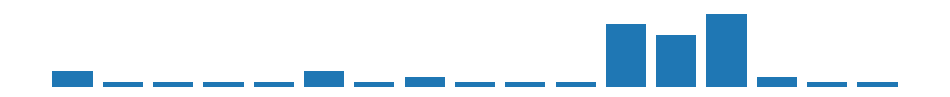

In [25]:
impresso.search.facet("daterange", q="impresso")

## Year

Get the number of articles that mention "impresso", published during every particular year.

,count,uid,item.refs.c,item.refs.a,item.refs.m
val,,,,,
1861,3,1861,55749,55749,126
1894,1,1894,124620,124620,190
1946,1,1946,339605,339605,6770

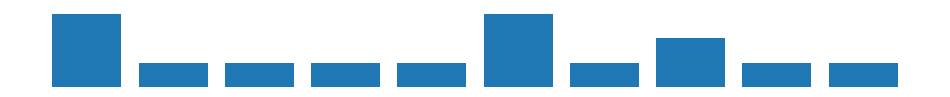

In [26]:
impresso.search.facet("year", q="impresso")

## Content length

Get the number of articles that mention "impresso", grouped by content length.

,count
val,
0,6
100,6
200,11

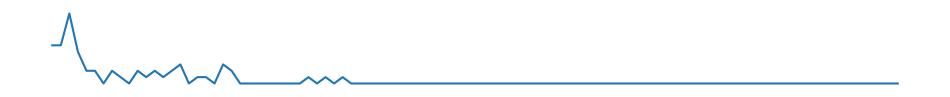

In [27]:
impresso.search.facet("contentLength", q="impresso")

## Month

Get the number of articles that mention "impresso", published during every particular month.

,count
val,
1,2
2,3
3,5

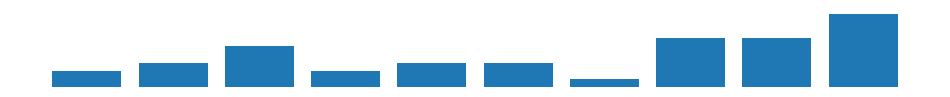

In [28]:
impresso.search.facet("month", q="impresso")

## Country

Get the number of articles that mention "impresso", grouped by country they were published in.

,count
val,
CH,55
LU,1

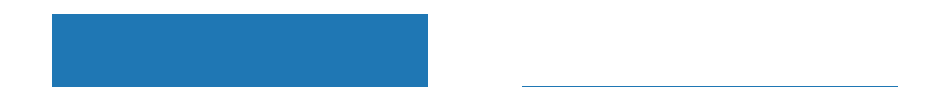

In [29]:
impresso.search.facet("country", q="impresso")

## Type

Get the number of items that mention "impresso", grouped by type of item.

,count
val,
ad,14856907
ar,24836851
ob,123835

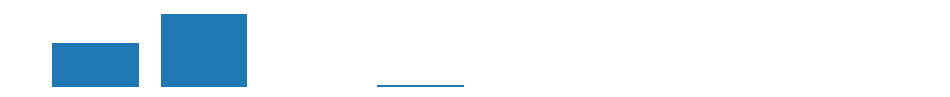

In [30]:
impresso.search.facet("type")

## Topic

Find topics that the articles mentioning "impresso" are related to.

,count,uid,item.uid,item.language,item.community,item.pagerank,item.degree,item.x,item.y,item.relatedTopics,item.countItems,item.excerpt,item.words,item.model
val,,,,,,,,,,,,,,
tm-de-all-v2.0_tp00_de,241,tm-de-all-v2.0_tp00_de,tm-de-all-v2.0_tp00_de,de,,0,0,0,0,[],265405,"[{'w': 'london', 'p': 0.02403}, {'w': 'new', '...","[{'w': 'london', 'p': 0.02403}, {'w': 'new', '...",tm-de-all-v2.0
tm-de-all-v2.0_tp01_de,527,tm-de-all-v2.0_tp01_de,tm-de-all-v2.0_tp01_de,de,,0,0,0,0,[],377965,"[{'w': 'new', 'p': 0.03594}, {'w': 'york', 'p'...","[{'w': 'new', 'p': 0.03594}, {'w': 'york', 'p'...",tm-de-all-v2.0
tm-de-all-v2.0_tp02_de,741,tm-de-all-v2.0_tp02_de,tm-de-all-v2.0_tp02_de,de,,0,0,0,0,[],512501,"[{'w': 'zimmer', 'p': 0.02682}, {'w': 'wort', ...","[{'w': 'zimmer', 'p': 0.02682}, {'w': 'wort', ...",tm-de-all-v2.0

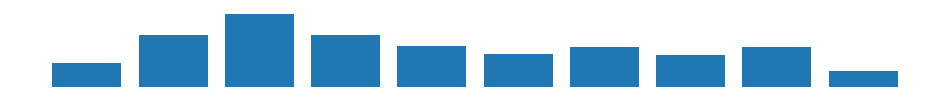

In [31]:
impresso.search.facet("topic", q="pomme")

## Collection

Find collections the articles mentioning "pomme" are part of.

,count,uid,item.uid,item.name,item.description,item.status,item.creationDate,item.lastModifiedDate,item.countItems,item.creator.uid,item.creator.username,item.labels
val,,,,,,,,,,,,
local-roka-UaJ1domy,16,local-roka-UaJ1domy,local-roka-UaJ1domy,estelle-test-collection-for-recsys-not-working,containing paris roubaix or paris roubais or ...,PRI,2020-09-24T09:11:42+00:00,2020-09-24T09:14:51.970000+00:00,6193,local-roka,roman.kalyakin,"[bucket, collection]"

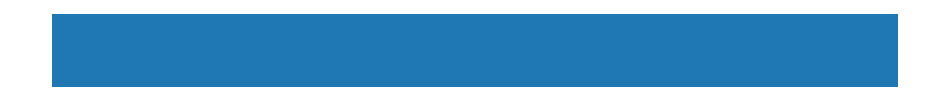

In [32]:
impresso.search.facet("collection", q="pomme")

## Newspaper

Find newspapers that the articles mentioning "Schengen" were published in.

,count,uid,item.uid,item.acronym,item.labels,item.languages,item.included,item.name,item.endYear,item.startYear,item.countArticles,item.countIssues,item.countPages,item.deltaYear,item.properties,item.fetched
val,,,,,,,,,,,,,,,,
DTT,18,DTT,,,[newspaper],[],True,La Sentinelle,NaN,NaN,-1.0,-1.0,-1.0,0.0,[],True
EXP,1424,EXP,EXP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FZG,681,FZG,FZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

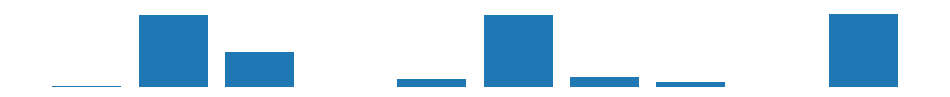

In [33]:
impresso.search.facet("newspaper", q="Schengen")

## Language

Find all languages the articles mentioning "impresso" were published in.

,count,uid
val,,
de,5784,de
en,2,en
fr,6446,fr

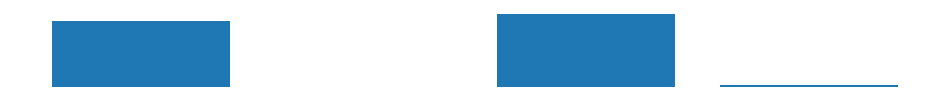

In [34]:
impresso.search.facet("language", q="Schengen")

## Person

Find all persons mentioned in articles that mention "Schengen". Get only the last page.

,count,uid,item.uid
val,,,
aida-0001-50-Étienne_Schmit,3,aida-0001-50-Étienne_Schmit,aida-0001-50-Étienne_Schmit
aida-0001-50-Íngrid_Betancourt,1,aida-0001-50-Íngrid_Betancourt,aida-0001-50-Íngrid_Betancourt
aida-0001-50-İsmail_Cem_İpekçi,3,aida-0001-50-İsmail_Cem_İpekçi,aida-0001-50-İsmail_Cem_İpekçi

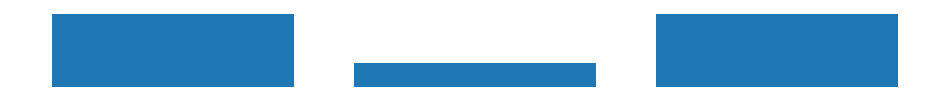

In [35]:
impresso.search.facet("person", q="Schengen", offset=7140)

## Location

Find all locations mentioned in articles that mention "Schengen". Get only the last page.

,count,uid,item.uid
val,,,
aida-0001-54-Ünye,1,aida-0001-54-Ünye,aida-0001-54-Ünye
aida-0001-54-Łomża,2,aida-0001-54-Łomża,aida-0001-54-Łomża
aida-0001-54-Świnoujście,1,aida-0001-54-Świnoujście,aida-0001-54-Świnoujście

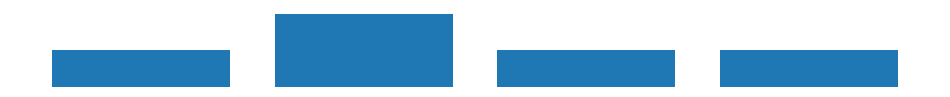

In [36]:
impresso.search.facet("location", q="Schengen", offset=3310)

## NAG

Find all entities without a known type mentioned in articles that mention "homme" and "femme".

,count
val,
bert-nag-55-AFP,12
bert-nag-55-AP,17
bert-nag-55-ATS_SDA,50

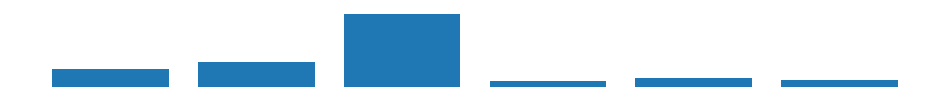

In [37]:
from impresso import AND
impresso.search.facet("nag", title=AND("homme", "femme"))

## Access rights

Get access rights of articles mentioning "pomme".

,count
val,
Closed,5677
OpenPrivate,47691
OpenPublic,2128

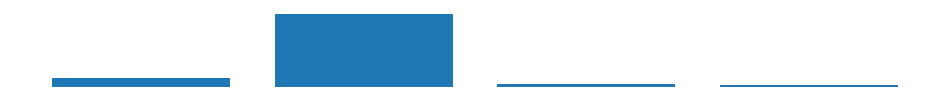

In [38]:
impresso.search.facet("accessRight", q="pomme")

## Partner

Get Impresso partners that provided articles mentioning "pomme".

,count
val,
BNL,4862
Migros,1230
NZZ,2751

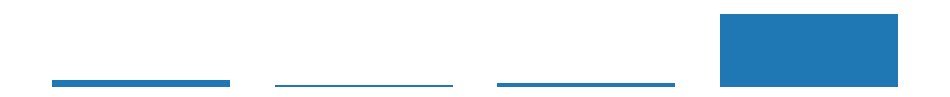

In [39]:
impresso.search.facet("partner", q="pomme")